In [292]:
import pandas as pd

def pp(*args):
    

    if len(args) == 1:
        print(args[0], '\n')
    elif len(args) == 2:
        print(args[0], args[1], '\n')
    else:    
        print('too many args\n')


def df_info(df):
    pp(df.describe())
    pp(df.head())
    pp('Shape: ', df.shape)
    pp('Size: ', df.size)
    pp('n dim: ', df.ndim)


In [293]:

df = pd.read_csv('./GOOG.csv')
df_info(df)

              Open         High          Low        Close    Adj Close  \
count  3313.000000  3313.000000  3313.000000  3313.000000  3313.000000   
mean    380.186092   383.493740   376.519309   380.072458   380.072458   
std     223.818650   224.974534   222.473232   223.853780   223.853780   
min      49.274517    50.541279    47.669952    49.681866    49.681866   
25%     226.556473   228.394516   224.003082   226.407440   226.407440   
50%     293.312286   295.433502   289.929291   293.029114   293.029114   
75%     536.650024   540.000000   532.409973   536.690002   536.690002   
max     992.000000   997.210022   989.000000   989.679993   989.679993   

             Volume  
count  3.313000e+03  
mean   8.038476e+06  
std    8.399521e+06  
min    7.900000e+03  
25%    2.584900e+06  
50%    5.281300e+06  
75%    1.065370e+07  
max    8.276810e+07   

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  49.676899  51.693783  47.669952  49.845

In [294]:
# We load the Google stock data into a DataFrame
google_stock = pd.read_csv('./GOOG.csv', index_col=['Date'], usecols=['Date', 'Adj Close'], parse_dates=True)

# We load the Apple stock data into a DataFrame
apple_stock = pd.read_csv('./AAPL.csv', index_col=['Date'], parse_dates=True, usecols=['Date', 'Adj Close'])

# We load the Amazon stock data into a DataFrame
amazon_stock = pd.read_csv('./AMZN.csv', index_col=['Date'], parse_dates=True, usecols=['Date', 'Adj Close'])
amazon_stock

,Adj Close
Date,
2000-01-03,89.375000
2000-01-04,81.937500
2000-01-05,69.750000
2000-01-06,65.562500
2000-01-07,69.562500
...,...
2017-10-09,990.989990
2017-10-10,987.200012
2017-10-11,995.000000


In [295]:
# We create calendar dates between '2000-01-01' and  '2016-12-31'
dates = pd.date_range('2000-01-01', '2016-12-31')
pp(dates)

# We create and empty DataFrame that uses the above dates as indices
all_stocks = pd.DataFrame(index = dates)
pp(all_stocks)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=6210, freq='D') 

Empty DataFrame
Columns: []
Index: [2000-01-01 00:00:00, 2000-01-02 00:00:00, 2000-01-03 00:00:00, 2000-01-04 00:00:00, 2000-01-05 00:00:00, 2000-01-06 00:00:00, 2000-01-07 00:00:00, 2000-01-08 00:00:00, 2000-01-09 00:00:00, 2000-01-10 00:00:00, 2000-01-11 00:00:00, 2000-01-12 00:00:00, 2000-01-13 00:00:00, 2000-01-14 00:00:00, 2000-01-15 00:00:00, 2000-01-16 00:00:00, 2000-01-17 00:00:00, 2000-01-18 00:00:00, 2000-01-19 00:00:00, 2000-01-20 00:00:00, 2000-01-21 00:00:00, 2000-01-22 00:00:00, 2000-01-23 00:00:00, 2000-01-24 00:00:00, 2000-01

In [296]:
# Change the Adj Close column label to Google
google_stock = google_stock.rename(columns={'Adj Close':'GOOG close'})

# Change the Adj Close column label to Apple
apple_stock = apple_stock.rename(columns={'Adj Close':'APPL close'})

# Change the Adj Close column label to Amazon
amazon_stock = amazon_stock.rename(columns={'Adj Close':'AMAZ close'})

In [297]:
# We join the Google stock to all_stocks
all_stocks = all_stocks.join(google_stock)


# We join the Apple stock to all_stocks
all_stocks = all_stocks.join(apple_stock)


# We join the Amazon stock to all_stocks
all_stocks = all_stocks.join(amazon_stock)
all_stocks.describe()



,GOOG close,APPL close,AMAZ close
count,3115.000000,4277.000000,4277.000000
mean,347.420229,35.222976,166.095436
std,187.671596,37.945557,189.212345
min,49.681866,0.843106,5.970000
25%,220.088539,3.221090,38.009998
50%,286.397247,17.524017,76.980003
75%,508.255340,64.533600,243.919998
max,813.109985,126.941574,844.359985


In [298]:
# Print the column-wise count of NaN values, if any, in the all_stocks dataframe
print(all_stocks.isnull().sum())


# Remove any rows that contain NaN values. Do this operation inplace. 
all_stocks.dropna(axis=0, inplace=True)
all_stocks

GOOG close    3095
APPL close    1933
AMAZ close    1933
dtype: int64


,GOOG close,APPL close,AMAZ close
2004-08-19,49.845802,1.973460,38.630001
2004-08-20,53.805050,1.979244,39.509998
2004-08-23,54.346527,1.997236,39.450001
2004-08-24,52.096165,2.053144,39.049999
2004-08-25,52.657513,2.123831,40.299999
...,...,...,...
2016-12-23,789.909973,115.088142,760.590027
2016-12-27,791.549988,115.819054,771.400024
2016-12-28,785.049988,115.325203,772.130005
2016-12-29,782.789978,115.295570,765.150024


In [299]:
# Print the average stock price for each stock
print(all_stocks.mean())

# Print the median stock price for each stock
print(all_stocks.median())

# Print the standard deviation of the stock price for each stock  
print(all_stocks.std())

# Print the correlation between stocks
print(all_stocks.corr())

GOOG close    347.420229
APPL close     47.736018
AMAZ close    216.598177
dtype: float64
GOOG close    286.397247
APPL close     39.461483
AMAZ close    161.820007
dtype: float64
GOOG close    187.671596
APPL close     37.421555
AMAZ close    199.129792
dtype: float64
            GOOG close  APPL close  AMAZ close
GOOG close    1.000000    0.900242    0.952444
APPL close    0.900242    1.000000    0.886321
AMAZ close    0.952444    0.886321    1.000000


In [303]:
rollingMean = all_stocks.rolling(150).mean()
print(rollingMean)
print(all_stocks['GOOG close'])

            GOOG close  APPL close  AMAZ close
2004-08-19         NaN         NaN         NaN
2004-08-20         NaN         NaN         NaN
2004-08-23         NaN         NaN         NaN
2004-08-24         NaN         NaN         NaN
2004-08-25         NaN         NaN         NaN
...                ...         ...         ...
2016-12-23  758.236666  105.283072  764.176933
2016-12-27  758.713066  105.417301  764.624933
2016-12-28  759.111599  105.537030  765.050133
2016-12-29  759.502732  105.651415  765.385067
2016-12-30  759.763799  105.760198  765.635933

[3115 rows x 3 columns]
2004-08-19     49.845802
2004-08-20     53.805050
2004-08-23     54.346527
2004-08-24     52.096165
2004-08-25     52.657513
                 ...    
2016-12-23    789.909973
2016-12-27    791.549988
2016-12-28    785.049988
2016-12-29    782.789978
2016-12-30    771.820007
Name: GOOG close, Length: 3115, dtype: float64


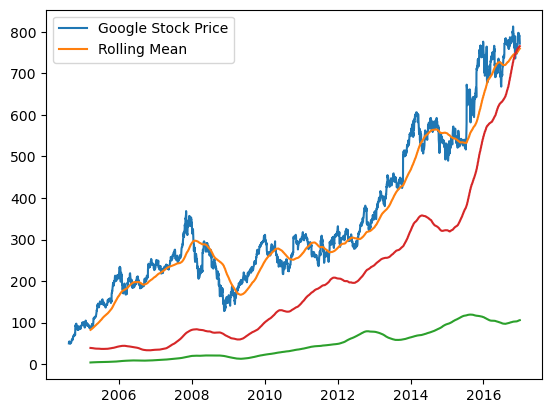

In [304]:
# this allows plots to be rendered in the notebook
%matplotlib inline 

# We import matplotlib into Python
import matplotlib.pyplot as plt


# We plot the Google stock data
plt.plot(all_stocks['GOOG close'])

# We plot the rolling mean ontop of our Google stock data
plt.plot(rollingMean)
plt.legend(['Google Stock Price', 'Rolling Mean'])
plt.show()